In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")

In [3]:
n_synthetic = 200 - len(df) 

In [4]:
features = df.drop("1st Order lnC0/Ct", axis = 1).values
targets = df["1st Order lnC0/Ct"].values

In [5]:
synthetic_features = []
synthetic_targets = []

In [6]:
for _ in range(n_synthetic):
    i, j = np.random.choice(len(df), size = 2, replace = False)
    alpha = np.random.uniform(0, 1)

    new_feature = alpha * features[i] + (1-alpha) * features[j]
    new_target = alpha * targets[i] + (1-alpha) * targets[j]

    synthetic_features.append(new_feature)
    synthetic_targets.append(new_target)

In [7]:
feature_columns = df.drop("1st Order lnC0/Ct", axis = 1).columns
synthetic_data = pd.DataFrame(synthetic_features, columns = feature_columns)
synthetic_data["1st Order lnC0/Ct"] = synthetic_targets

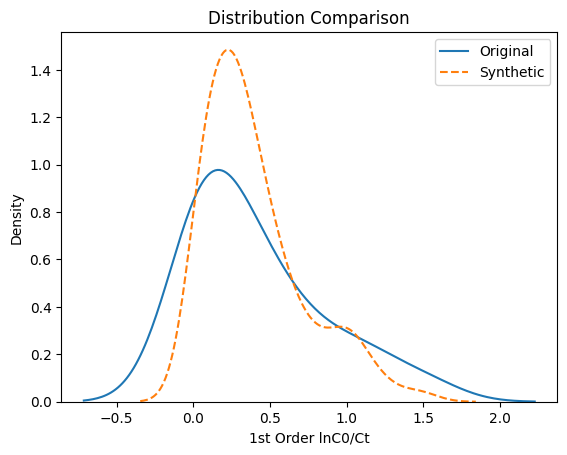

In [8]:
sns.kdeplot(df['1st Order lnC0/Ct'], label='Original')
sns.kdeplot(synthetic_data['1st Order lnC0/Ct'], label='Synthetic', linestyle='--')
plt.legend()
plt.title('Distribution Comparison')
plt.show()